 # iris dataset

 - load iris dataset
 - split to train and test
 - train KNN classifiers for different K
 - choose the best K determined on test set

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

In [6]:
iris = load_iris()
print ('data contains:',iris.keys())
X, y, labels, feature_names  = iris.data, iris.target, iris.target_names, iris['feature_names']
df_iris= pd.DataFrame(X, columns= feature_names) 
df_iris['label'] =  y
features_dict = {k:v for k,v in  enumerate(labels)}
df_iris['label_names'] = df_iris.label.apply(lambda x: features_dict[x])
df_iris

data contains: dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),label,label_names
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2,virginica
146,6.3,2.5,5.0,1.9,2,virginica
147,6.5,3.0,5.2,2.0,2,virginica
148,6.2,3.4,5.4,2.3,2,virginica


In [9]:
df_iris.iloc[50:]

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),label,label_names
50,7.0,3.2,4.7,1.4,1,versicolor
51,6.4,3.2,4.5,1.5,1,versicolor
52,6.9,3.1,4.9,1.5,1,versicolor
53,5.5,2.3,4.0,1.3,1,versicolor
54,6.5,2.8,4.6,1.5,1,versicolor
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2,virginica
146,6.3,2.5,5.0,1.9,2,virginica
147,6.5,3.0,5.2,2.0,2,virginica
148,6.2,3.4,5.4,2.3,2,virginica


In [10]:
y = df_iris['label']
X= df_iris[['sepal length (cm)','sepal width (cm)','petal length (cm)','petal width (cm)']]

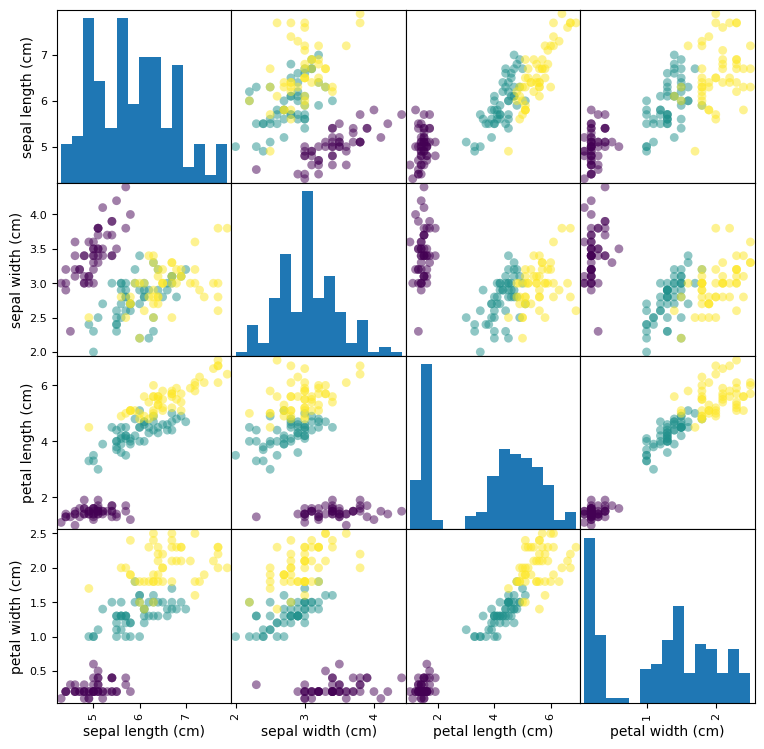

In [11]:
scatter = pd.plotting.scatter_matrix(X, c= y, marker = 'o', s=40, hist_kwds={'bins':15}, figsize=(9,9))

In [18]:
from sklearn.model_selection import train_test_split # sklearn 
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
print ('X_train.shape=', X_train.shape)
print ('y_train.shape=', y_train.shape)
print ('X_test.shape=', X_test.shape)
print ('y_test.shape=', y_test.shape)
print ('X_train[0]=')
X_train.iloc[0]


X_train.shape= (112, 4)
y_train.shape= (112,)
X_test.shape= (38, 4)
y_test.shape= (38,)
X_train[0]=


sepal length (cm)    5.9
sepal width (cm)     3.0
petal length (cm)    4.2
petal width (cm)     1.5
Name: 61, dtype: float64

In [26]:
from sklearn.neighbors import KNeighborsClassifier 


In [27]:
from sklearn.preprocessing import StandardScaler 
from sklearn.metrics import accuracy_score
scaler = StandardScaler()
X_train_scaled= scaler.fit_transform(X_train)                #Це лише для навчального!!!
X_test_scaled= scaler.transform(X_test)                 #Це для тестового



In [ ]:
results = {}  

for k in range(1, 21):  
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    y_pred = knn.predict(X_test_scaled)
    accuracy = accuracy_score(y_test, y_pred)
    results[k] = accuracy  


best_k = max(results, key=results.get)  
best_accuracy = results[best_k]  

print(f"Найкраще K: {best_k}")
print(f"Точність: {best_accuracy}")

Найкраще K: 3
Точність: 0.9736842105263158


# synthetic dataset
    - generrate synthetic dataset
    - split to train and test
    - train KNN regressors for different `K`
    - choose the best `K` determined on test set
    - visualize the decision boundary 


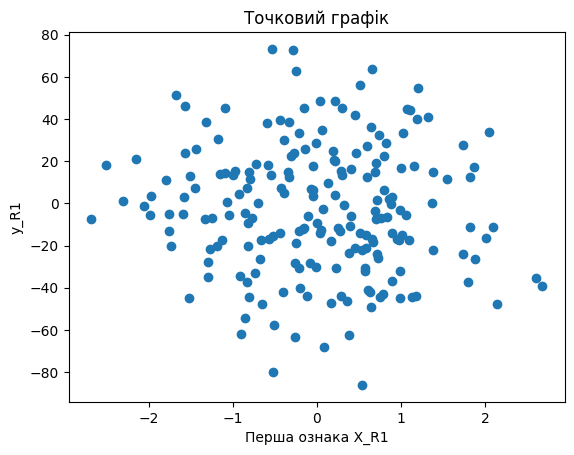

In [48]:
import numpy as np

from sklearn.datasets import make_regression # sklearn
X_R1, y_R1 = make_regression(
    n_samples = 200,
    n_features=4,
    n_informative=1,
    bias = 0,
    noise = 15) 

plt.figure()
plt.scatter(X_R1[:, 0], y_R1) # Вибираємо першу ознаку з X_R1
plt.xlabel("Перша ознака X_R1")
plt.ylabel("y_R1")
plt.title("Точковий графік")
plt.show()

In [49]:

X_train, X_test, y_train, y_test = train_test_split(X_R1, y_R1, random_state=0)

In [50]:
from sklearn.preprocessing import MinMaxScaler
def normalize(X_train, X_test):
        scaler= MinMaxScaler()
        X_train_scaled= scaler.fit_transform(X_train)
        X_test_scaled = scaler.transform(X_test)
        return X_train_scaled, X_test_scaled

X_train_scaled, X_test_scaled  = normalize(X_train, X_test)

print(X_test_scaled)

[[ 0.64190077  0.91424418  0.45187027  0.55256609]
 [ 0.59682947  0.34540023  0.48593183  0.7191094 ]
 [ 0.50104675  0.17568959  0.41208601  0.59629456]
 [ 0.35765283  0.20952475  0.69119228  0.19465096]
 [ 0.61910533  0.51763604  0.56492225  0.35152595]
 [ 0.55965622  0.31903004  0.30794158  0.25535039]
 [ 0.56224325  0.53745539  0.60774098  0.53673287]
 [ 0.42530163  0.565289    0.3164908   0.60231583]
 [ 0.34469479  0.69453727  0.60688836  0.43857753]
 [ 0.37035222  0.39531094  0.47640524  0.6391798 ]
 [ 0.68221841  0.76885879  0.51807425  0.69237754]
 [ 0.40800546  0.89200153  0.35726295  0.6761244 ]
 [ 0.33071919  0.57121869  0.38705535  0.58546891]
 [ 0.39801295  0.88544187  0.27448937  0.55864113]
 [ 0.44270504  0.65093002  0.60745496  0.63549514]
 [ 0.75081317  0.24471901  0.56547874  0.40036455]
 [ 0.74999862  0.56148719  0.15336658  0.46539208]
 [ 0.30825683  0.30753479  0.34980799  0.26064667]
 [ 0.27833698  0.5059945   0.23986667  0.53305949]
 [ 0.62009875  0.42307321  0.54

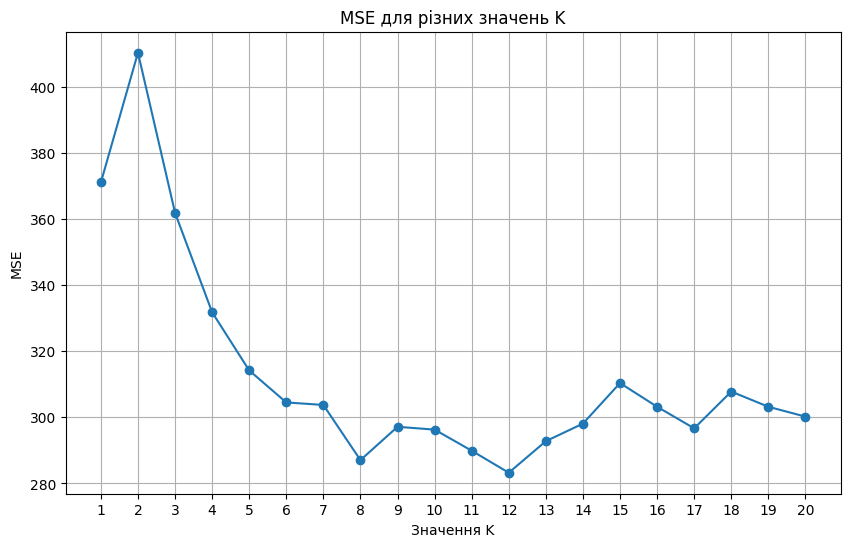

Найкраще K: 12
MSE: 283.25774319773785


In [ ]:

from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error                      #Середня квадратична помилка 

results = {}
mse_values = []  

for k in range(1, 21):  
    knn = KNeighborsRegressor(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    y_pred = knn.predict(X_test_scaled)
    mse = mean_squared_error(y_test, y_pred)
    results[k] = mse
    mse_values.append(mse)  


best_k = min(results, key=results.get)
best_mse = results[best_k]

plt.figure(figsize=(10, 6))
plt.plot(range(1, 21), mse_values, marker='o')
plt.title('MSE для різних значень K')
plt.xlabel('Значення K')
plt.ylabel('MSE')
plt.xticks(range(1, 21))
plt.grid(True)
plt.show()

print(f"Найкраще K: {best_k}")
print(f"MSE: {best_mse}")